# Computing $\pi$ with python
Fabien Roquet, 01/12/2020

The constant $\pi$ is defined as the ratio between the perimeter of a circle and its diameter: 
$$P = \pi D = 2\pi R$$
$\pi$ is a central constant in mathematics, found not only in geometry but in fact in all areas of mathematics.
For more information, refer to https://en.wikipedia.org/wiki/Pi

We will discuss here several methods to compute $\pi$, which will allow us to introduce some important concepts in scientific programming and present the python modules *numpy* and *matplotlib*.

--------------
## How to access the value of $\pi$ in python: you can enter it manually!

In [175]:
pi = 3.141592653589793
R = 2.5
P = 2*pi*R
print('pi = ',pi)
print(f'Perimeter of a circle of radius {R} m: {P:5.3f} m')

pi =  3.141592653589793
Perimeter of a circle of radius 2.5 m: 15.708 m


--------------
## Approximating $\pi$ with rational numbers

**$\pi$ is irrational**: it means that it cannot be written as the ratio of two integers. Most real numbers are irrationals, yet only rational numbers can be explicitely represented in a computer. Famous examples of irrational numbers include: $\sqrt{2}$ and $e$.

Using super-computers, mathematicians have been able to compute the first $10^{13}$ decimals of $\pi$, however it is physically impossible to know the infinite many decimals. In other word, we can never know exactly the value of $\pi$.

Of course this does not prevent us from using $\pi$. In practice, knowledge of an approximate value is sufficient. Rational numbers, being the ratio between two integers can be easily defined and computed. A famous approximation of $\pi$ is the ratio 22/7.

In [190]:
# Common approximation used in the past
pi_approx = 22/7
print('pi_approx = ',pi_approx)

relative_error = (pi_approx - pi)/pi*100
print(f'relative error: {relative_error:2.3g}%' )

pi_approx =  3.142857142857143
relative error: 0.0402%


In [209]:
def relative_error_pi(pi_approx):
    # relative error in percentage
    relative_error = np.abs((pi_approx - pi)/pi*100)
    print(f'value: {pi_approx}, relative error: {relative_error:2.3g}%' )
    return

relative_error_pi(pi_approx)

value: 3.142857142857143, relative error: 0.0402%


--------------
## How to get the value of $\pi$ in python?

Use module *numpy*

In [192]:
import numpy as np
pi = np.pi
print('pi = ',pi)

pi =  3.141592653589793


--------------
## Compute $\pi$ using trigonometric functions

Use the formula: $\pi = 4 * \arctan (1)$

The function arctan, as well as all standard trigonometric functions, are available in the module *numpy*.

In [210]:
import numpy as np
pi_trigo = 4*np.arctan(1)
relative_error_pi(pi_trigo)

value: 3.141592653589793, relative error:  0%


--------------
## How to compute $\pi$ if you don't have access to trigonometric functions?
https://en.wikipedia.org/wiki/Approximations_of_%CF%80

In order to compute a number, a computer can use only simple algebraic operations on rational numbers with finite precision. Here we present different methods to compute numerically the value of $\pi$. These methods are not particularly efficient, but they are presented as a way to illustrate some simple computational methods.

* method 1: Archimedian's formula based on a polygonial approximation of the circle
* method 2: arctan formula using the Taylor series expansion of the arctan function
* method 3: use a recurrence formula based on the double factorial identity



--------------
* method 1: Archimedian's formulas using polygonal approximations of the circle of increasing edge numbers. 
https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/29504/versions/23/previews/html/ComputationOfPiByArchimedes.html

Using geometry, it is possible to compute the length of a polygone enclosing the circule with increasing number of sides. Starting from an hexagone (perimeter $P_6 = 6/\sqrt{3}$), it is possible to compute the perimeter of a polygon with doubled number of edges, leading to a recursive formula of the form $P_{2k} = function(P_k)$.

Here we use the following recursive formula:
$$a_6 = \sqrt{3}$$
$$a_{2k} = a_k + \sqrt{a_k^2+1}$$

Then, $\pi$ is approximated by the ratio $\pi\simeq k/a_k$.
Let's implement here this recurrence formula.

In [211]:
import numpy as np

N = 20 # number of iterations

# init values
k = 6
a = np.sqrt(3)

# iterate
for n in range(1,N):
    k = k * 2
    a = a + np.sqrt(a**2 + 1)

# final result
pi_approx1 = k / a

relative_error_pi(pi_approx1)

value: 3.1415926535908394, relative error: 3.33e-11%


In [212]:
# let's create a function to compute the N-order approximation
def pi_archimede(N):
    
    import numpy as np
    k = 6
    a = np.sqrt(3)

    for n in range(1,N):
        k = k * 2
        a = a + np.sqrt(a**2 + 1)

    pi_approx = k / a

    return pi_approx

relative_error_pi(pi_archimede(20))

value: 3.1415926535908394, relative error: 3.33e-11%


Text(0, 0.5, 'Error [%]')

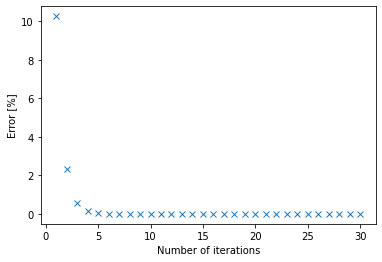

In [230]:
# plot error as a function of number of iterations
N = 30
iter_index = np.arange(N)+1
pi_approx_table = np.zeros(N) # init a table to store values

for n in range(N):
    pi_approx_table[n] = pi_archimede(n+1)

relative_error = np.abs((pi_approx_table-np.pi)/np.pi)*100

import matplotlib.pyplot as plt
plt.plot(iter_index,relative_error,'x')
plt.xlabel('Number of iterations')
plt.ylabel('Error [%]')

Text(0, 0.5, 'Error [log scale]')

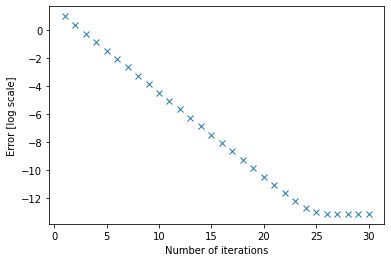

In [231]:
import matplotlib.pyplot as plt
plt.plot(iter_index,np.log10(relative_error),'x')
plt.xlabel('Number of iterations')
plt.ylabel('Error [log scale]')

**Note:** The precision that can be achieved is limited by the representation of floating-point numbers in the machine. Here, python uses a double precision, meaning numbers have a maximum possible precision of $10^{-14}$. For this reason, even if we increase the number of iterations, after a certain point, the precision remains fixed.

In [169]:
1 + 1e-15 - 1

1.1102230246251565e-15

In [171]:
1 + 1e-16 - 1

0.0

**Note 2:** We have cheated in fact as we have used the square root function, which is not a basic algebraic operation. It is possible to compute the square-root using a numerical method. This is in fact how Archimedes did it. Below we propose an implementation of the Babylonian's method (a.k.a. Heron's method).

See https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

$$y_0 \simeq \sqrt{x}$$
$$y_{k+1} = \frac{1}{2}\left(y_k + \frac{x^2}{y_k}\right)$$

By iterating this relation, the value of $y_k$ will converge toward $\sqrt{x}$.

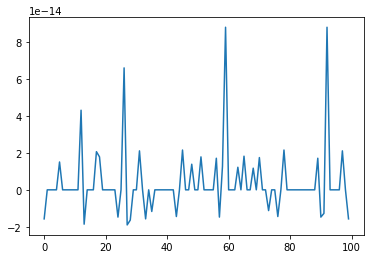

In [199]:
def square_root(x, N=5):

    def base2_exponent(x):
        n = 0
        sign = 1
        if x<1:
            x = 1/x
            sign = -1
        while x>1:
            x /= 4
            n += 1
        return sign*n

    y = 2**base2_exponent(x)
    for k in range(N):
        y = (y + x/y)/2
    return y

X2 = 8**np.linspace(1,15,100)
X = np.array( [square_root(X2[i]) for i in range(len(X2))] )
relative_error = (X - np.sqrt(X2))/np.sqrt(X2)*100
plt.plot(relative_error)

--------------
* method 2: Use Taylor series expansion of arctan
https://en.wikipedia.org/wiki/Taylor_series#Trigonometric_functions

    Many standard function can be written as an infinite sum of polynomial terms, the so-called Taylor series expansion. Under certain conditions, the terms of increasing orders becomes small providing an effective way to approximate the function by summing a finite number of these terms. The *arctan* function has a particularly simple Taylor series expansion that can be exploited to compute $\pi$.
    $$ arctan(x) = \sum_{k=0}^\infty{\frac{(-1)^k}{2k+1}x^{2k+1}} $$
    
    Using the exact identity $\pi = 4 * \arctan (1)$, we obtain the formula:
    $$ \pi = 4 * \sum_{k=0}^\infty{\frac{(-1)^k}{2k+1}} $$

In [226]:
N = 10
s = 1

for k in range(1,N):
    s += (-1)**k / (2*k+1)
pi_approx2 = 4*s

relative_error_pi(pi_approx2)

value: 3.0418396189294032, relative error: 3.18%


Text(0, 0.5, 'Error [log scale]')

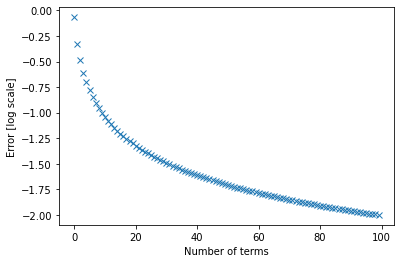

In [227]:
# compute and plot the error as a function of the number of terms retained
N = 100
s = np.ones(N)

for k in range(1,N):
    s[k] = s[k-1] + (-1)**k / (2*k+1)
pi_approx2 = 4*s

import matplotlib.pyplot as plt
plt.plot(np.arange(N),np.log10(np.abs(pi_approx2-pi)),'x')
plt.xlabel('Number of terms')
plt.ylabel('Error [log scale]')

--------------
* method 3: Use double factorial formula
    $$\frac{\pi}{2} = \sum_{k=0}^\infty{\frac{2^k k!^2}{(2k+1)!}}$$
    
    We can exploit the relation between consecutive terms in the sum.
    $$ u_k = \frac{2^k k!^2}{(2k+1)!} $$
    can be equivalently defined using a recurrence formula,
    $$u_0 = 1$$
    $$u_k = \frac{k}{2k+1} u_{k-1},\, k>0$$
    
    and 
    $$\pi \simeq 2 * \sum_{k=0}^N{u_k}$$

Exercise: compute pi approximations and plot the error as a function of the number of terms used in the sum.

--------------
# Conclusion

* A computer can perform only basic operations on finite precision numbers.
* By default, modern computers uses a double precision, i.e. 64 bits floating-point numbers with a decimal precision of $10^{-15}$.
* *numpy* is the specialized python module to manipulate arrays of floating-point numbers. Most scientific libraries are built on top of *numpy*.
* A variety of algorithms exist to compute approximations of mathematical numbers and functions, often relying on iterative procedures.
* *numpy* and *scipy* offer a large variety of optimized functions with efficient implementations of standard algorithms.

Exercise: Explain why the two results below differ: